# Image Similarity Search


In [1]:
import os
import sys
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
from model import ImageSimilaritySearch
import torch
import numpy as np

# Initialize model
similarity_search = ImageSimilaritySearch(
    device='cuda' if torch.cuda.is_available() else 'cpu',
    top_n=5,
    build_index=True,
    support_dataset_embeddings_path=
)



NameError: name '__file__' is not defined


Top similar images and company names from OCR labels:
Image: 6dddc4a2-2128279_00_obj_0.jpeg
Similarity: 0.9918
Company Name: IWK

Image: 2453d9b3-2128275_00_obj_0.jpeg
Similarity: 0.9427
Company Name: IWK

Image: 446228c2-2409854_obj_0.jpeg
Similarity: 0.8776
Company Name: IWK

Image: 9537604d-2412729_00_obj_0.jpeg
Similarity: 0.8731
Company Name: IWK

Image: c5f24acc-2027233_01_obj_0.jpeg
Similarity: 0.8729
Company Name: IWK



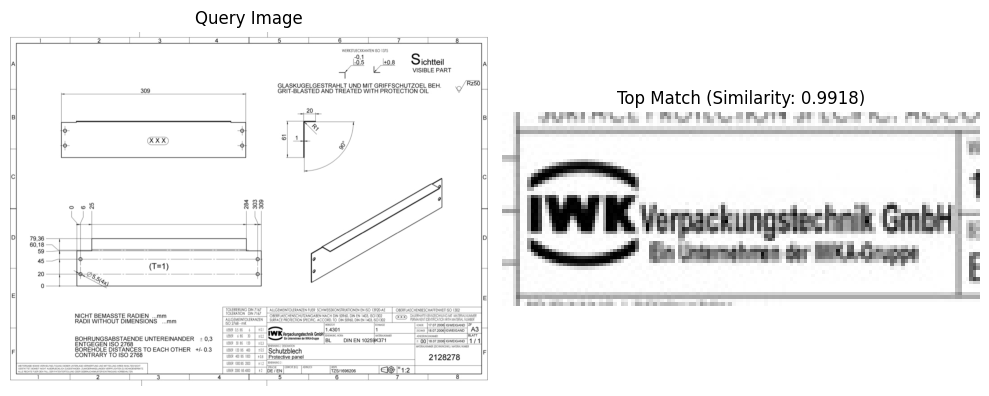

In [9]:
# Step 1: Load support dataset images and extract features
# Step 2: Build index for fast similarity search
# Step 3: Get similar image paths and get company names from OCR labels CSV
# Step 4: Display results

# Get similar image paths and extract text
import easyocr
import pandas as pd
reader = easyocr.Reader(['en'])

# Load and display query image
image_dir = "/home/chogerlate/Documents/github/logo-detection/logo_detection_dataset/datasets/annotated_drawings/val/images"
query_image_path = str(Path(image_dir) / np.random.choice(os.listdir(image_dir)))
query_image = Image.open(query_image_path)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(query_image, cmap='gray' if query_image.mode == 'L' else None)
plt.title("Query Image")
plt.axis('off')

# Extract features and search
query_embedding = similarity_search.extract_feature(query_image_path, is_crop=True)
indices, similarities = similarity_search.search(query_embedding)

image_folder = "/home/chogerlate/Documents/github/logo-detection/support_dataset"
similar_image_paths = similarity_search.search_image(indices, image_folder)

# Load OCR labels from CSV
label_df = pd.read_csv('support_dataset/ocr_labels.csv')

# Display results
plt.subplot(1, 2, 2)
plt.imshow(Image.open(similar_image_paths[0]))  # Show top match
plt.title(f"Top Match (Similarity: {similarities[0]:.4f})")
plt.axis('off')

print("\nTop similar images and company names from OCR labels:")
for path, similarity in zip(similar_image_paths, similarities):
    image_name = os.path.basename(path)
    # Look up company name from CSV
    company_name = label_df[label_df['name'] == image_name]['label'].values[0] if image_name in label_df['name'].values else "Not found in OCR labels"
    
    print(f"Image: {image_name}")
    print(f"Similarity: {similarity:.4f}")
    print(f"Company Name: {company_name}\n")

plt.tight_layout()
plt.show()

# Create a DataFrame with image names and OCR results from support dataset

In [3]:
# Create a DataFrame with image names and OCR results from support dataset
import pandas as pd
import os
from tqdm import tqdm

# Define image directory
image_dir = "/home/chogerlate/Documents/github/logo-detection/support_dataset"
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Initialize lists to store data
image_names = []
ocr_labels = []

# Process each image in the directory with progress bar
print("Processing images with OCR...")
for image_file in tqdm(image_files):
    image_path = os.path.join(image_dir, image_file)
    
    # Extract text using OCR
    try:
        results = reader.readtext(image_path)
        detected_text = ' '.join([text[1] for text in results]) if results else "No text detected"
    except Exception as e:
        print(f"Error processing {image_file}: {str(e)}")
        detected_text = "Error in OCR processing"
    
    # Append to lists
    image_names.append(image_file)
    ocr_labels.append(detected_text)

# Create DataFrame
df = pd.DataFrame({
    'name': image_names,
    'label': ocr_labels
})

# Display the DataFrame
print("\nDataFrame of Images and OCR Results:")
display(df)

# Save DataFrame to CSV (optional)
df.to_csv('ocr_labels.csv', index=False)
print("\nDataFrame saved to 'ocr_labels.csv'")



Processing images with OCR...


100%|██████████| 85/85 [00:02<00:00, 33.23it/s]


DataFrame of Images and OCR Results:


,name,label
0,9e991b2a-2437943_00_obj_0.jpeg,IWK 457 company
1,a24e569f-2221288_00_obj_0.jpeg,IWK
2,5fce0e99-2213762_00_obj_0.jpeg,IWK
3,d7b1c90c-2124374_00_obj_0.jpeg,No text detected
4,d0c815bf-2430576_00_obj_0.jpeg,IGYsTAR IWK Cnce pacuaeo Grdlt
...,...,...
80,5f962031-2437923_00_obj_0.jpeg,IWK
81,446228c2-2409854_obj_0.jpeg,Eorkglecchk e ll Guth
82,ccce9e64-2217245_00_obj_0.jpeg,IWK
83,2db5098e-2213769_01_obj_0.jpeg,IWK



DataFrame saved to 'ocr_labels.csv'


# Display Image

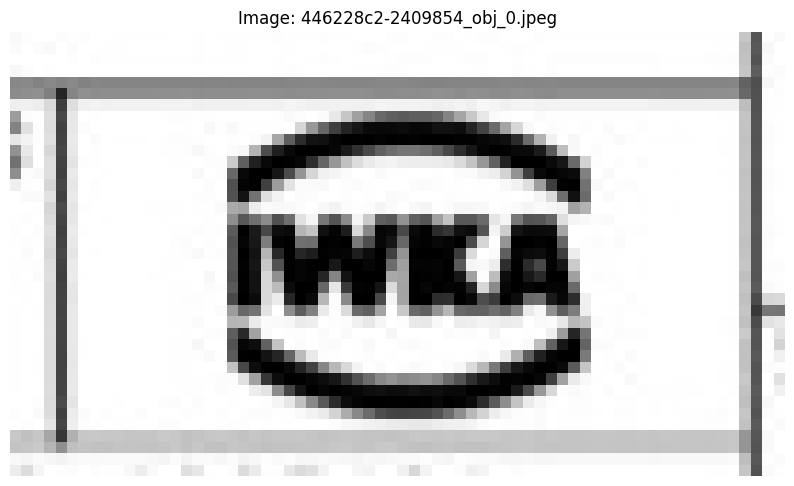

In [7]:
# Import required libraries
import matplotlib.pyplot as plt
from PIL import Image

# Define image path
image_path = "/home/chogerlate/Documents/github/logo-detection/support_dataset/d7b1c90c-2124374_00_obj_0.jpeg"

# Read and display the image
try:
    # Open image using PIL
    img = Image.open(image_path)
    
    # Create figure with reasonable size
    plt.figure(figsize=(10, 8))
    
    # Display image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title("Image: 446228c2-2409854_obj_0.jpeg")
    
    plt.show()
except Exception as e:
    print(f"Error loading image: {str(e)}")
